In [1]:
#import packages

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


In [30]:
"""
the first step is to import and examine the original dataset.
"""

events_df = pd.read_csv('events.csv')#.drop(columns='Unnamed: 0')
events_df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [31]:
"""
and the data characteristics.
"""
print(events_df.count())
print(events_df.groupby("visitorid").count().count())

timestamp        2756101
visitorid        2756101
event            2756101
itemid           2756101
transactionid      22457
dtype: int64
timestamp        1407580
event            1407580
itemid           1407580
transactionid    1407580
dtype: int64


In [32]:
event_count=events_df.groupby("visitorid").count()
view1=event_count[event_count.event==1]
view1.count()

timestamp        1001560
event            1001560
itemid           1001560
transactionid    1001560
dtype: int64

STEP ONE

we can know that the data contains many users who had made only one
interaction.

data washing: clean all visitors whose event is only one "view".

In [9]:
"""
a natural way is to group by visitor_id, and find groups that contains
only one event.
"""

one_event=events_df[events_df.visitorid.isin(view1.index)]
one_event

,timestamp,visitorid,event,itemid,transactionid
4,1433221337106,951259,view,367447,NaN
10,1433222162373,176446,view,10572,NaN
16,1433223239808,1377281,view,251467,NaN
18,1433224244282,1370216,view,176721,NaN
23,1433221275206,864246,view,36642,NaN
...,...,...,...,...,...
2756083,1438401803214,1392454,view,4148,NaN
2756093,1438400498250,226214,view,190530,NaN
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN


In [12]:
"""
However, there are some visitors who leaves only one interaction, but
it is not "view".
"""

one_event.groupby("event").count()



,timestamp,visitorid,itemid,transactionid
event,,,,
addtocart,2537,2537,2537,0
transaction,70,70,70,70
view,998953,998953,998953,0


In [34]:
"""
so the way to filter records made by mis-clicking is to drop useless
data by combining useful data together.

df1, df2 contains the data created from:
df1: the visitors who created >=2 interactions.
df2: the visitors whose unique interaction is not "view".
"""


viewMulti=event_count[event_count.event!=1]
df1=events_df[events_df.visitorid.isin(viewMulti.index)]
df2=one_event[one_event.event!="view"]
useful_events=pd.concat([df1,df2]).reindex()
useful_events

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
5,1433224086234,972639,view,22556,NaN
...,...,...,...,...,...
2752156,1438382070092,1242522,addtocart,79572,NaN
2752706,1438406175062,1234066,addtocart,448690,NaN
2752754,1438348670144,772436,addtocart,56230,NaN
2754140,1438366420897,932481,addtocart,158448,NaN


turn washed data to csv file

In [ ]:
useful_events.to_csv("useful events.csv")



STEP TWO

finding the count of events each visitor created
raw2, data are legacy vars

**most visitors have created 2-7 events**


In [35]:
events_df = pd.read_csv('useful events.csv').drop(columns='Unnamed: 0')

In [45]:
"""
the next step is to delete visitors who have created too few events.
this cell is to find the distribution of the amount of events of each visitor.
"""
raw0=events_df.groupby("visitorid").count()
raw1=raw0.groupby("event").count()
raw1.head(15)

,timestamp,itemid,transactionid
event,,,
1,2607,2607,2607
2,205992,205992,205992
3,79612,79612,79612
4,38796,38796,38796
5,22967,22967,22967
6,14178,14178,14178
7,9482,9482,9482
8,6812,6812,6812
9,4940,4940,4940


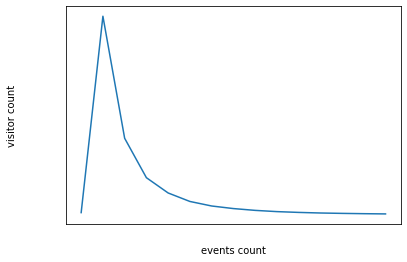

In [49]:
x=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]
y=[  2607, 205992,  79612,  38796,  22967,  14178,   9482,   6812,
         4940,   3659,   2831,   2217,   1822,   1511,   1269]
plt.xlabel("events count")
plt.ylabel("visitor count")
plt.tick_params(axis="x",colors="white")
plt.tick_params(axis="y",colors="white")
plt.plot(x,y)


In [51]:
"""
find all visitors that have created 8 or more events.
"""

select1=raw0[raw0.event>=8]
selected_df=events_df[events_df.visitorid.isin(select1.index)].reindex()
selected_df

,timestamp,visitorid,event,itemid,transactionid
1,1433224214164,992329,view,248676,NaN
19,1433223203944,125625,view,17655,NaN
21,1433222147345,1076270,view,262799,NaN
23,1433221377547,1153198,view,388242,NaN
27,1433224644638,361387,view,43485,NaN
...,...,...,...,...,...
1754534,1438399811281,804736,addtocart,346534,NaN
1754535,1438398087349,126458,view,439758,NaN
1754536,1438398473572,709520,view,104512,NaN
1754537,1438399289446,701750,view,296172,NaN


In [53]:
selected_df.to_csv("selected events.csv")


In [54]:
"""
the final step is to turn the raw data into formatted data structure:
visitor_id (integer) | item_id (integer) | rating (integer or float)

as for the rating, this project uses the simplest way: turn implicit data into
explicit rating by replacing.
"""
events_df.loc[:,"event"]=events_df["event"]\
    .replace("view",1)\
    .replace("addtocart",3)\
    .replace("transaction",6)\
    .astype("int32")


In [55]:
"""
as for the data structure, this project deletes all useless columns, create a new
dataframe to collect data, and use a two-dimension loop to implement.

the first loop is to group all events by visitors.

the groups in this loop are the visitors' ratings, whose indices are visitor_id, and
rows are the data structure as required, but not arranged.

"""

visitor_events=events_df.drop(labels=["timestamp","transactionid"],axis=1)\
    .groupby("visitorid")

visitors=visitor_events.indices
processed_events=pd.DataFrame(data=None,columns=["visitorid","itemid","event"])

visitor_events.get_group(2)

,visitorid,event,itemid
475880,2,1,216305
477170,2,1,325215
481568,2,1,342816
481610,2,1,325215
483072,2,1,342816
483138,2,1,259884
486158,2,1,216305
486246,2,1,325215


In [ ]:
"""
the second loop is to get each groups, and combine them into a single, reformatted
dataframe.


WARNING: LONG PROCESSING TIME REQUIRED!
"""
for visitor in visitors:
    mid1=visitor_events.get_group(visitor)
    mid2=mid1.groupby("itemid").max().reset_index()
    processed_events=pd.concat([processed_events,mid2])



In [ ]:
processed_events.reindex().to_csv("processed events.csv")



